In [ ]:
!pip install spotipy

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hisham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("data.csv")
# Display the first two rows of the 'data' dataset
data.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


In [3]:
genre_data = pd.read_csv('data_by_genres.csv')
# Display the first two rows of the 'genre_data' dataset
genre_data.head(2)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


In [4]:
year_data = pd.read_csv('data_by_year.csv')
# Display the first two rows of the 'year_data' dataset
year_data.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


In [5]:
artist_data=pd.read_csv("data_by_artist.csv")
# Display the first two rows of the 'artist_data' dataset
artist_data.head(2)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690,0.176212,103.044154,0.268865,30.576923,5


In [6]:
# Create a decade column using apply() and a lambda function
data['decade'] = data['year'].apply(lambda year: (year // 10) * 10)

# Display the updated data with the decade column
print(data)

        valence  year  acousticness  \
0        0.0594  1921       0.98200   
1        0.9630  1921       0.73200   
2        0.0394  1921       0.96100   
3        0.1650  1921       0.96700   
4        0.2530  1921       0.95700   
...         ...   ...           ...   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
0       ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                          ['Dennis Day']         0.819   
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                        ['Frank Parker']         0.275   
4                                          ['Phil Regan']         0.418   
...                                                   ...           ...   
170648

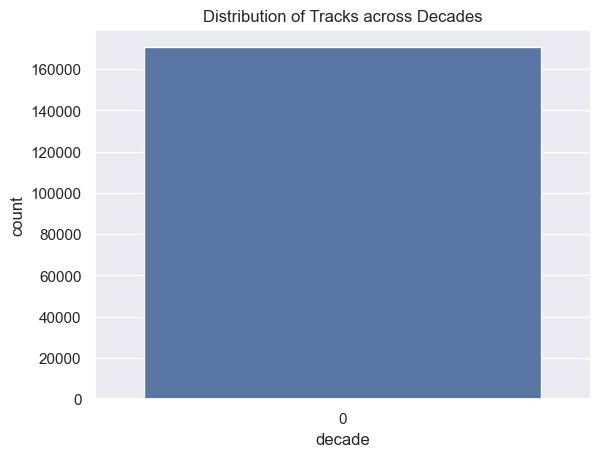

In [7]:
# Set the style of the plot
sns.set(style='darkgrid')

# Create the count plot
sns.countplot(data['decade'])

# Set the labels and title
plt.xlabel('decade')
plt.ylabel('count')
plt.title('Distribution of Tracks across Decades')

# Display the plot
plt.show()

In [8]:
import plotly.express as px

# Create the line plot
fig = px.line(year_data, x='year', y=['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence'],
              title='Trend of various sound features over decades')

# Display the plot
fig.show()

In [9]:
# Create the line plot
fig = px.line(year_data, x='year', y='loudness', title='Trend of loudness over decades')

# Display the plot
fig.show()

In [10]:
# Identify the top 10 genres based on popularity
top10_genres = genre_data.sort_values('popularity', ascending=False).head(10)

# Create the grouped bar chart
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title='Trend of various sound features over top 10 genres')

# Display the plot
fig.show()

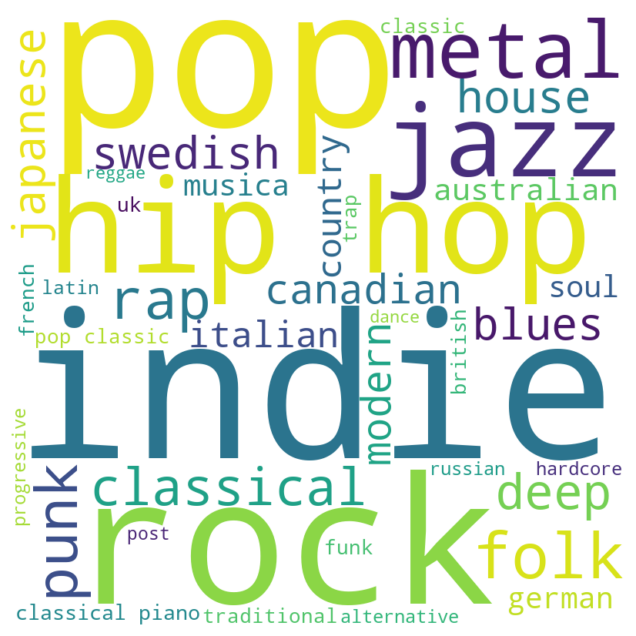

In [12]:
#Concatenate all genres into a single string
genres_text = ' '.join(genre_data['genres'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=None, max_words=40, min_font_size=10).generate(genres_text)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
artist_data.head(20)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5
5,1,36,0.609556,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5
6,1,2,0.725000,"""Mama"" Helen Teagarden",0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8
7,1,2,0.927000,"""Test for Victor Young""",0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10
8,1,122,0.173145,"""Weird Al"" Yankovic",0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9
9,1,15,0.544467,$NOT,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1


In [14]:
def process_artist(artist):
    if isinstance(artist, str):
        return artist.split()[-1]
    elif isinstance(artist, list):
        return artist[-1]
    else:
        return None

In [15]:
artists = artist_data['artists'].apply(process_artist).unique()
artists

array(['Cast', 'Chorus', 'Orchestra', ..., '黃國隆', '黑豹', '조정현'],
      dtype=object)

In [16]:
# Convert all the text data to lowercase
artist_data['artists'] = artist_data['artists'].apply(lambda x: x.lower())

# Replace newline characters and commas with spaces
artist_data['artists'] = artist_data['artists'].apply(lambda x: x.replace('\n', ' ').replace(',', ' '))

# Tokenize the text data into individual words
artist_data['artists'] = artist_data['artists'].apply(lambda x: x.split())

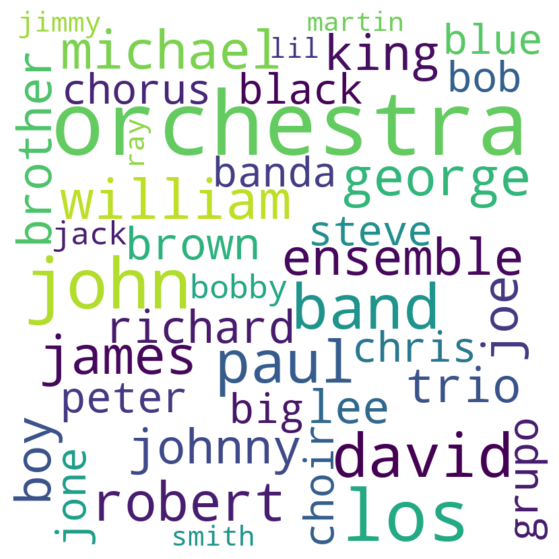

In [17]:
# Convert the list of artists into a single string
artist_words = ' '.join(artist_data['artists'].sum())

# Remove stopwords and non-alphabetic words
stopwords = set(stopwords.words('english'))
comment_words = ' '.join([word for word in artist_words.split() if word not in stopwords and word.isalpha()])

# Generate the word cloud visualization
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_word_length=3, max_words=40, min_font_size=10).generate(comment_words)

# Display the word cloud visualization
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
from collections import Counter
# Use the Counter class from the collections module to count the occurrences of each artist
artist_counts = Counter(artist_data['artists'].sum())

# Convert the Counter object to a DataFrame
artist_counts_df = pd.DataFrame(list(artist_counts.items()), columns=['artists', 'count'])

# Display the top 10 artists with the most songs produced
top10_most_song_produced_artists = artist_counts_df.sort_values('count', ascending=False).head(10)

print(top10_most_song_produced_artists[['count','artists']])

      count    artists
9      2097        the
115     734          &
14      572  orchestra
55      356         de
70      299         of
16      288        and
375     259        los
845     238        his
3412    206       john
180     183       band


In [20]:
top10_popular_artists = artist_data.nlargest(10, 'popularity')
top10_most_song_produced_artists = artist_data.nlargest(10, 'count')


print('Top 10 Artists that had most popularity score:')
top10_popular_artists[['popularity','artists']].sort_values('popularity',ascending=False)

Top 10 Artists that had most popularity score:


,popularity,artists
20966,93.0,"[ritt, momney]"
14354,92.0,"[lele, pons]"
15070,90.0,"[los, legendarios]"
11764,89.0,"[jerry, di]"
7463,88.0,[emilee]
23687,88.0,"[surf, mesa]"
28263,88.0,"[salem, ilese]"
213,87.0,[a7s]
2343,86.0,[beltito]
14378,86.0,"[lenny, santos]"
